# Horn Radio Telescope Spectra Plotting Usage Examples

### Glen Langston, 2021 September 17

This notebook shows examples of plotting observations of our Milky Way galaxy.  The notebook expects read data in Radio Astronomy Service (RAS) ascii format.   There are two file types, Astronomy observations (.ast) and Calibration, Hot-load, observations (.hot).  The files have exactly the same format except that the .hot observations are made while the horn is pointed towards the ground.

The calibration methods assume that the observations of the ground will see the temperature of the Earth, about 290 Kelvins (about 63 Fahrenheit).   The actual measurement is the sum of the _Receiver_ temperature plus the ground.

The calibration requireds an observation of the sky, which is assumed to be very cold, 10 Kelvins, (about -442 Fahrenheit) along with several observations of the ground, to measure the intensity of hydrogen in the arms of our Milky Way.

In [1]:
# Import the Radio Astronomy Service (RAS) code.
import ras

In [2]:
#Sometimes new packages are flagged as missing the first time the astronomy code is
#imported.   If a package is missing, uncomment these lines and test the installation.
#The ! command indicates the command is executed on the "command line", not in the notebook
#!pip3 install PyAstronomy
#import PyAstronomy

In [3]:
# To simpify working with observations in different directories the "rasnames"
# package will search for .ast and .hot files in lists of directories, as well as a list of
# file names
import rasnames

In [4]:
# now create a Plot object
p = ras.Plot(verbose=False)

In [5]:
# without arguemnts the plot object lists the command line options
names = p.help("")

ras.help(flags): Plotting Inputs for telescope obs.
Usage: .help('<flags> <files>')
Where <flags> are:
-A optionally scale intensities by count of spectra averaged
-B <sample> Set first sample to plot (default is 1/4 of samples)
-BASE  Fit and remove a spectral baseline
-C optionally flag the center of the band
-E <sample> Set last sample to plot (default is end of samples)
-H optionally set the high velocity region for baseline fit
-I <integration time> Time (seconds) to average observations before plotting
-K <dir> optionally keep average hot and cold load calibration observations
-L optionally set the low velocity region for baseline fit
-N <number> optionally set the number of spectra to plot
-O <dir> optionally output intermediate, average files
-P <dir> write PNG and PDF files instead of showing plot
-Q optionally plot intensity versus freQuency, instead of velocity
-R optionally flag known RFI Lines
-S <filename> optionally set summary file name
-U optionally update reference fr

In [6]:
# configure the plot to 
# -R flag known radio interference
# -C flag (interpolate over) the center channal
# -I 600.  Average the different observations for 600 seconds
# "data" look in the 'data' directory for the observations
names = p.help("-R -C -I 600. data")
# show the list of fine names found
print(names)

Flagging RFI
Spectral integration time for averaging: 600.000000
['data']


In [7]:
# now look in the list of directories and return the full file names
# This program only lookes for file types given.  The program could be used for any purpuse
# radio astronomy or any other type of input search.
files, count = rasnames.splitNames(names, ".ast", ".hot", doDebug=False)

Ploting Intensity versus Frequency
Date: 2020-11-28
  Time   AZ,EL (deg)  Lon,Lat (deg)    Max   Median    Count  
18:10:51 180.0,-40.0  301.3,-27.6    1.857    1.616   2160000
18:23:58 180.0,-40.0  301.2,-27.5    1.892    1.643   2160000
18:37:04 180.0,-40.0  301.2,-27.4    1.944    1.685   2160000
18:50:11 180.0,-40.0  301.2,-27.3    1.977    1.714   2160000
19:06:02 180.0,-40.0  301.2,-27.2    1.969    1.708   1440000
19:19:09 180.0, 60.0   36.9, 10.8    0.846    0.707   2160000
19:32:15 180.0, 60.0   38.4,  7.9    0.841    0.706   2160000
19:45:22 180.0, 60.0   39.8,  5.0    0.827    0.701   2160000
19:58:28 180.0, 60.0   41.3,  2.1    0.810    0.697   2160000


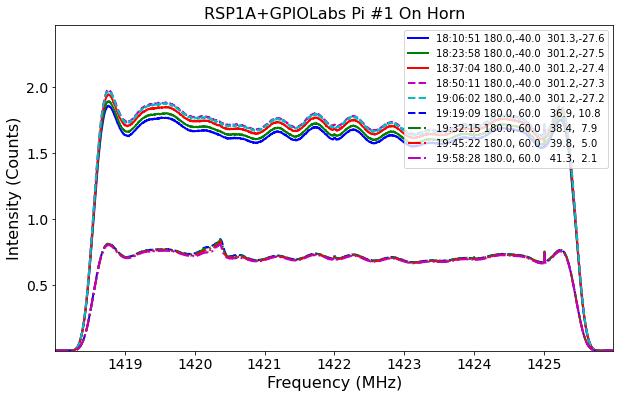

In [8]:
p.raw(files)

In [9]:
# start a new plot with different parameters
# -V plot intensity versus velocity 
p2 = ras.Plot(verbose=False)

In [10]:
# configure the plot to:
# -R flag known radio interference
# -C flag (interpolate over) the center channal
# -I 900.  Average the different observations for a number seconds
# -V plot velocity in selected range
# -BASE subtract a spectral baseline
# "data" look in the 'data' directory for the observations
names = p2.help("-R -C -I 900. -V -BASE data")
# show the list of fine names found

Flagging RFI
Spectral integration time for averaging: 900.000000
Fitting and subtracking a baseline


Reading Hot Load observations
Found  23 Hot load observations
Reading Cold Sky observations
No high Galactic Latitude data
Min, Max El:   60.0,  60.0 deg; Min, Max Glat:   0.25,  11.39 deg
Found 9 Cold Sky Observations
Median Receiver Temp:  195.73 +/-  1.75 ( 3.08  0.42) (K)
Ploting Intensity versus Velocity
Date: 2020-11-28
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median     Count  
19:21:46 180.0, 60.0   36.6, 11.4    39.57     0.71   2880000
19:40:07 180.0, 60.0   38.6,  7.3    38.06     0.78   2880000
19:58:28 180.0, 60.0   40.7,  3.2    32.99     0.40   2880000


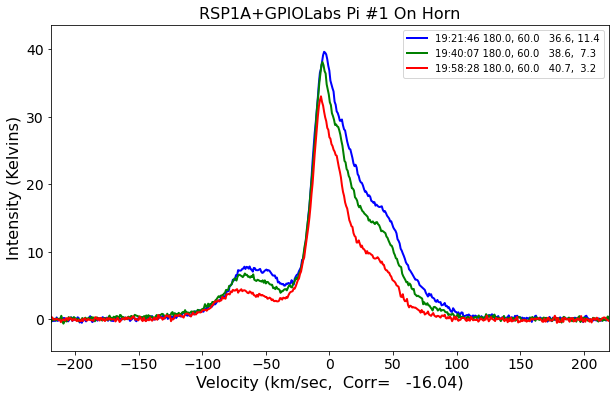

In [11]:
# now look at tsys-calibrated test data
p2.tsys(names)

In [19]:
# These next steps show how to steer your notebook to your observations
# The calibrate the spectra.
# You'll have to change your directories to match your system
%cd "/Users/glangsto/Research/archive"
%pwd
dira = "pi1-data-20Dec10"
# Next plot the t-sys calibrated plot of the observations
#%ls "pi1-data-20Dec10"
files = rasnames.splitNames(dira, doDebug=False)

/Users/glangsto/Desktop/Research/archive


In [23]:
# create yet another plot class
# -R flag known radio interference
# -C flag (interpolate over) the center channal
# -I 900.  Average the different observations for a number seconds
# -V plot velocity in selected range
# -BASE subtract a spectral baseline
# "data" look in the 'data' directory for the observations
p3 = ras.Plot()
names = p3.help("-R -C -I 3600. -V -BASE pi1-data-20Dec04")
# show the list of fine names found

Flagging RFI
Spectral integration time for averaging: 3600.000000
Fitting and subtracking a baseline


Reading Hot Load observations
Found  20 Hot load observations
Reading Cold Sky observations
Median Receiver Temp:  256.29 +/-  0.50 ( 0.71  0.29) (K)
Ploting Intensity versus Velocity
Date: 2020-12-04
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median     Count  
05:52:29 180.0, 60.0  186.2,-27.4    69.23     1.07   9000000
06:55:24 180.0, 60.0  195.4,-14.4    56.13     0.91   9000000
07:58:18 180.0, 60.0  203.0,  0.7    19.01     0.81   9000000
09:01:13 180.0, 60.0  210.0, 13.2    10.82     0.62   9000000
10:04:08 180.0, 60.0  217.3, 27.3     8.88     0.51   9000000
11:07:03 180.0, 60.0  225.9, 41.2     7.70     0.32   9000000
12:09:58 180.0, 60.0  238.2, 54.5     8.78     0.81   9000000
13:49:29 180.0, 60.0  260.0, 65.9     9.27     0.62   5760000
14:52:24 180.0, 85.0   76.1, 80.1     5.42     0.45   9000000
15:55:19 180.0, 85.0   56.0, 67.9     8.57     0.93   9000000
16:58:14 180.0, 85.0   53.5, 54.8     9.31     0.86   9000000
18:01:09 180.0, 85.0   54.9, 41.7    13.39     0.60  

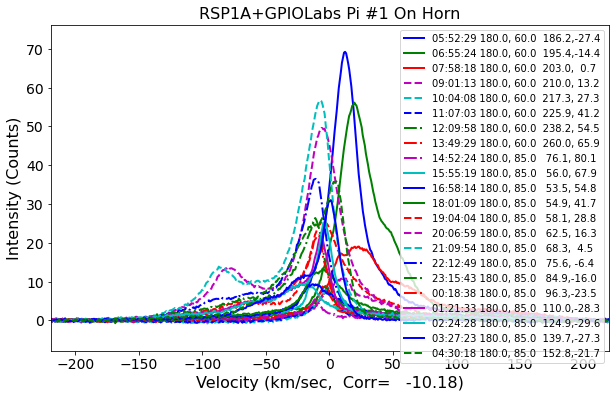

In [24]:
# now plot the average calibrated spectra for 24 hours of observations on
# December 4th, 2020 for telescope 1.
p3.tsys(names)